# Scan XTA Simulation Example: field2.dcm

## Simulation Setup

In [9]:
%matplotlib widget
import os, sys
from xta.xta import xta_sim

#### Setting Astra Path

In [2]:
#Possible generalization for environment dependency path
os.environ['ASTRA_BIN'] = os.getenv('ASTRA_BIN')
#print(os.getenv('ASTRA_BIN'))

In [3]:
#Edit this line to match your path if the above cell doesn't work
#%env ASTRA_BIN=/Users/colinrecker/Desktop/SLACForks/Astra

#### Setting Simulation Directory Path

In [4]:
#Define xta repo path
xta_path = '/Users/colinrecker/Desktop/SLACForks/xta'
os.chdir(xta_path)

#Define simulations directory path
sim_path = '/Users/colinrecker/Google Drive/My Drive/Colin/Simulations'

#Defining tumor scan path and scrape name of file
init_dcm_path = os.path.join(sim_path, 'inputs', 'Fluence Maps Anon', 'Field 2 Anon', 'field2.dcm')

#Defining vcc laser images path
vcc_path = os.path.join(sim_path, 'inputs', 'laser_mat_images', '*.mat')

field2 = xta_sim(xta_path, sim_path, init_dcm_path, vcc_path)

Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field2
Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field2/data
Created directory: /Users/colinrecker/Google Drive/My Drive/Colin/Simulations/field2/plots


### Generating Initial Electron Distribution

In [5]:
#Configuring distribution settings (distgen.yaml file)
field2.dist.input['n_particle'] = int(1e4)
fwhm = 0.06/2.355 # 60 fs = 0.06 ps
field2.dist.input['t_dist']['sigma_t']['value'] = fwhm

#Generating distribution with first index of laser images
particles, dist = field2.generate_dist(0)

## Run Simulation

### Configure Astra

In [6]:
#Adjusting astra inputs (xta.in file)
field2.astra.input['newrun']['zstart']=0.0
field2.astra.input['newrun']['zstop'] = 0.25
field2.astra.input['charge']['lspch'] = True
field2.astra.input['newrun']['zphase'] = 50
field2.astra.input['solenoid']['maxb(1)'] = 0.427

### Run Single Scan

In [7]:
#Scanning 
field2.simulation('scan', ['solenoid', 'maxb(1)'], interval=[0.42, 0.43], divisions=10)
print(field2.opt_val)

#Archive simulation with desired .h5 file name
field2.archive(f'B={field2.astra.input["solenoid"]["maxb(1)"]}')

0.42777777777777776


## Plots

#### Initial vs. Rotated Final Distribution

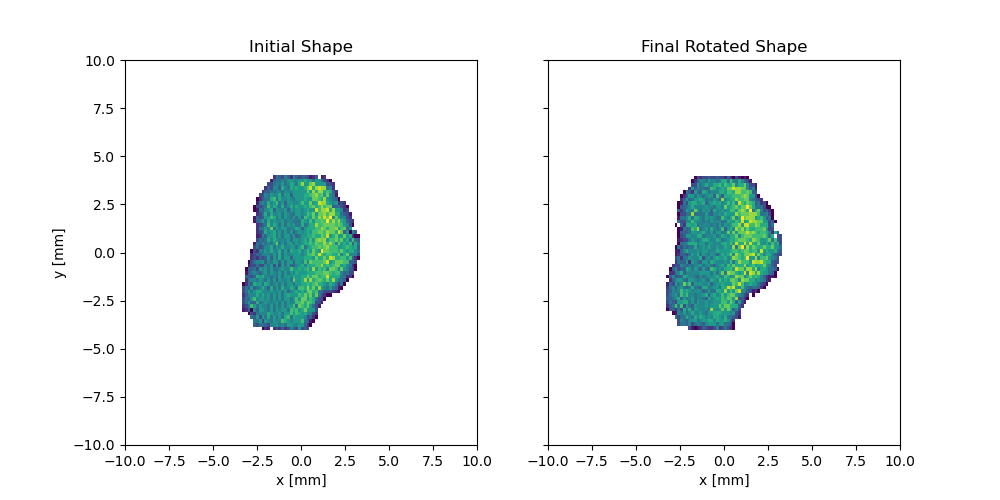

In [8]:
field2.plot('initial_vs_rotated')